**Code Below is for Udacity Writing a Data Science Blog Post Project**

For this project i've chosed to analyze given AirBnb data sets for Boston and Seattle.

Data sets:
- seattle.zip
    - calendar.csv
    - listings.csv
    - reviews.csv
- boston.zip
    - calendar.csv
    - listings.csv
    - reviews.csv

Through the project i will try to answer the following questions:
- Does wording effect reviews?
- Location vs revenue where to invest?
- Is finding aplicable to other data set?

The resulst are in below blog post:
https://medium.com/@m.bilgehankilinc/an-experienced-business-developer-vs-a-lazy-traveler-on-airbnb-seattle-and-boston-data-12771267b28b

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import zipfile as zf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Tokenization and Word Cloud
import re
import nltk
nltk.download(['wordnet', 'stopwords', 'punkt'])
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Clustering
from sklearn.cluster import KMeans
import folium

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def f_tokenize(text):
    '''
    This function takes a text column
    cleans from punctiation, tokenize it
    and remove english stop words
    then returns list constructed by tokenized text elements.
    input : a collection of test messages such as list/dataframe.
    output : a cleaned and tokenized list.
    '''
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    wnlm = WordNetLemmatizer()
    words = [wnlm.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return words

In [3]:
def f_word_cloud_gen(df, cloumn_name, cloud_name):
    # finally lets try to create a word cloud
    # Libraries for tokenization function
    '''
    This function takes a tokenized df column.
    Creates and save a word cloud image to the same directory.
    
    input : a collection of test messages such as list/dataframe and file name to save.
    output : an image containing word cloud.
    '''
    text = ' '.join(word for text in df[cloumn_name].values for word in text )
    w_cloud = WordCloud(width=4800, height=3200, max_words=400, background_color = 'white')
    cloud = w_cloud.generate(text)
    cloud.to_file('{}.png'.format(cloud_name))
    
    return cloud

In [4]:
# Load data
# Seattle data
zf_1 = zf.ZipFile('seattle.zip')
df_seattle_calendar = pd.read_csv(zf_1.open('calendar.csv'), index_col='listing_id', parse_dates=['date'])
df_seattle_listings = pd.read_csv(zf_1.open('listings.csv'), index_col='id', parse_dates=['last_scraped', 'calendar_last_scraped'])
df_seattle_reviews = pd.read_csv(zf_1.open('reviews.csv'), index_col='listing_id', parse_dates=['date'])


# Boston data
zf_2 = zf.ZipFile('boston.zip')
df_boston_calendar = pd.read_csv(zf_2.open('calendar.csv'), index_col='listing_id', parse_dates=['date'])
df_boston_listings = pd.read_csv(zf_2.open('listings.csv'), index_col='id', parse_dates=['last_scraped', 'calendar_last_scraped'])
df_boston_reviews = pd.read_csv(zf_2.open('reviews.csv'), index_col='listing_id', parse_dates=['date'])


/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


**1 . Exploratory Analysis**

In [5]:
# Calendar Csv
print(df_seattle_calendar.info(),'\n')
print(df_seattle_calendar.describe(),'\n')
print('Emptyness Percentage : ', df_seattle_calendar.isnull().sum()/df_seattle_calendar.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 241032 to 10208623
Data columns (total 3 columns):
date         1393570 non-null datetime64[ns]
available    1393570 non-null object
price        934542 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 42.5+ MB
None 

                       date available    price
count               1393570   1393570   934542
unique                  365         2      669
top     2016-12-27 00:00:00         t  $150.00
freq                   3818    934542    36646
first   2016-01-04 00:00:00       NaN      NaN
last    2017-01-02 00:00:00       NaN      NaN 

Emptyness Percentage :  date         0.00000
available    0.00000
price        0.32939
dtype: float64


In [6]:
# Listings Csv
print(df_seattle_listings.info(),'\n')
print(df_seattle_listings.describe(),'\n')
print('Emptyness Percentage : ', (df_seattle_listings.isnull().sum()/df_seattle_listings.shape[0]).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 241032 to 10208623
Data columns (total 91 columns):
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null datetime64[ns]
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_id               

In [7]:
# Reviews Csv
print(df_seattle_reviews.info(),'\n')
print(df_seattle_reviews.describe(),'\n')
print('Emptyness Percentage : ', (df_seattle_reviews.isnull().sum()/df_seattle_reviews.shape[0]).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 7202016 to 9727246
Data columns (total 5 columns):
id               84849 non-null int64
date             84849 non-null datetime64[ns]
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.9+ MB
None 

                 id   reviewer_id
count  8.484900e+04  8.484900e+04
mean   3.058765e+07  1.701301e+07
std    1.636613e+07  1.353704e+07
min    3.721000e+03  1.500000e+01
25%    1.725127e+07  5.053141e+06
50%    3.228809e+07  1.413476e+07
75%    4.457648e+07  2.762402e+07
max    5.873651e+07  5.281274e+07 

Emptyness Percentage :  comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
dtype: float64


In [8]:
print('Seattle Summary Stats')
print('Number of Unique Listings at 2016 : ', df_seattle_listings.index.nunique())
print('Average Availablity of Listings at 2016 :', round(np.mean(df_seattle_calendar.groupby(['listing_id', 'available'])['date'].count().unstack()['f'].dropna()/365), 2))
print('Average Price of Listings at 2016 :', round(np.mean(pd.to_numeric(df_seattle_calendar['price'].str.replace('$', '').str.replace(',', '')).dropna().groupby('listing_id').mean()), 2))
print('Average Review Score of Listings at 2016 : ', round(np.mean(df_seattle_listings.review_scores_value.dropna().groupby('id').mean()), 2))
print('Number of Reviews of Listings at 2016 : ', df_seattle_reviews.id.nunique())
print('Number of Unique Reviewers for Listings at 2016 : ', df_seattle_reviews.reviewer_id.nunique())

Seattle Summary Stats
Number of Unique Listings at 2016 :  3818
Average Availablity of Listings at 2016 : 0.4
Average Price of Listings at 2016 : 135.76
Average Review Score of Listings at 2016 :  9.45
Number of Reviews of Listings at 2016 :  84849
Number of Unique Reviewers for Listings at 2016 :  75730


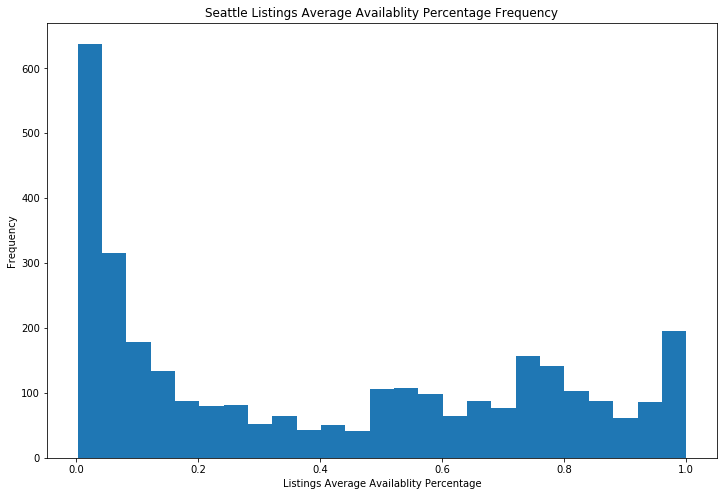

In [36]:
plt.figure(figsize=(12,8))
(df_seattle_calendar.groupby(['listing_id', 'available'])['date'].count().unstack()['f'].dropna()/365).plot(kind='hist', bins=25)
plt.title('Seattle Listings Average Availablity Percentage Frequency')
plt.xlabel('Listings Average Availablity Percentage')
plt.show()

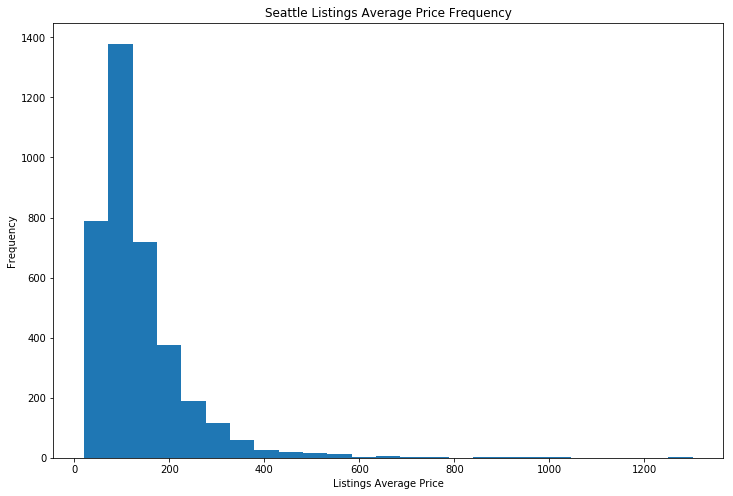

In [35]:
plt.figure(figsize=(12,8))
pd.to_numeric(df_seattle_calendar['price'].str.replace('$', '').str.replace(',', '')).dropna().groupby('listing_id').mean().plot(kind='hist', bins=25)
plt.title('Seattle Listings Average Price Frequency')
plt.xlabel('Listings Average Price')
plt.show()

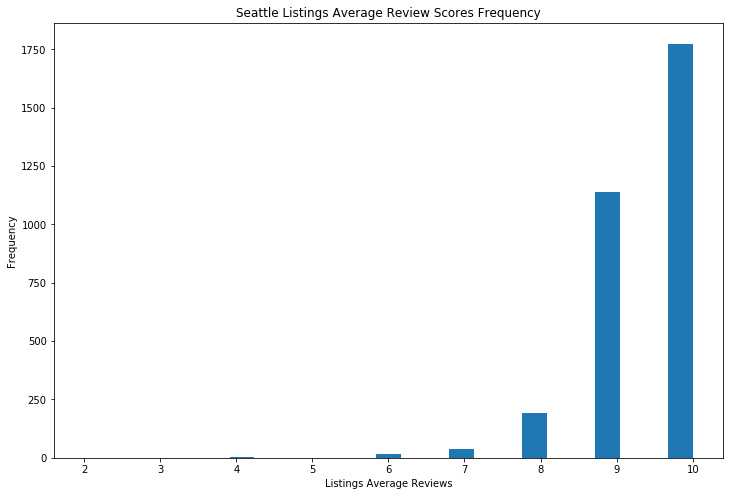

In [34]:
plt.figure(figsize=(12,8))
df_seattle_listings.review_scores_value.dropna().groupby('id').mean().plot(kind='hist', bins=25)
plt.title('Seattle Listings Average Review Scores Frequency')
plt.xlabel('Listings Average Reviews')
plt.show()

**2. Does Wording Of Descriptions Affect Reviews?**

In [12]:
# Lest take all descriptive columns and concatanete them into one column as str.
l__listings_des_cols = ['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit']
df_seattle_listings[l__listings_des_cols] = df_seattle_listings[l__listings_des_cols].astype('str')
df_seattle_listings['all_decription'] = df_seattle_listings[l__listings_des_cols].apply(','.join, axis=1)

# Create a new df for all descriptions and all reviews
# First join reviews and comments on id. This required to concatanate comments of id's into one rows.
# Assign new column names
# Tokenize descriptions and reviews for further investigations.
# First assignt str type to comments collumn.
df_seattle_reviews['comments'] = df_seattle_reviews['comments'].astype('str')
df_seattle_desc_vs_rew = df_seattle_listings['all_decription'].to_frame().join(df_seattle_reviews.groupby('listing_id')['comments'].agg(','.join))
df_seattle_desc_vs_rew.columns = ('all_description', 'all_reviews')

df_seattle_desc_vs_rew['tokenized_descs'] = df_seattle_desc_vs_rew['all_description'].astype('str').apply(f_tokenize)
df_seattle_desc_vs_rew['tokenized_revs'] = df_seattle_desc_vs_rew['all_reviews'].astype('str').apply(f_tokenize)

# Create intersection and differance of words
df_seattle_desc_vs_rew['words_intersection']  = str(None)
df_seattle_desc_vs_rew['words_difference']  = str(None)

for index in df_seattle_desc_vs_rew.index:
    df_seattle_desc_vs_rew.loc[index]['words_intersection'] = list(set(df_seattle_desc_vs_rew.loc[index]['tokenized_revs']).intersection(set(df_seattle_desc_vs_rew.loc[index]['tokenized_descs'])))
    df_seattle_desc_vs_rew.loc[index]['words_difference'] = list(set(df_seattle_desc_vs_rew.loc[index]['tokenized_revs']).difference(set(df_seattle_desc_vs_rew.loc[index]['tokenized_descs'])))

    
# Creating word clouds for 4 columns and saving it.
words_description_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'tokenized_descs', 'words_description_cloud')
words_review_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'tokenized_revs', 'worwords_review_cloudds_revs_cloud')

words_intersection_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'words_intersection', 'words_intersection_cloud')
words_difference_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'words_difference', 'words_difference_cloud')

print(words_description_cloud.words_)
print(words_review_cloud.words_)

print(words_intersection_cloud.words_)
print(words_difference_cloud.words_)

{'capitol hill': 1.0, 'downtown seattle': 0.9947489333770922, 'walking distance': 0.8224483098129307, 'living room': 0.8086642599277978, 'block away': 0.7545126353790613, 'house': 0.7131604857236626, 'home': 0.6662290777814244, 'bus line': 0.6445684279619298, 'pike place': 0.62192320315064, 'minute walk': 0.6012471283229406, 'nan nan': 0.5513619954053167, 'light rail': 0.5359369872005251, 'street parking': 0.5326550705612078, 'place market': 0.5241220872989826, 'space needle': 0.4932720708893994, 'bus stop': 0.44338693797177553, 'washer dryer': 0.4384640630127995, 'queen bed': 0.42402362979980307, 'queen anne': 0.41910075484082704, 'well': 0.4131933048900558, 'lake union': 0.38726616343944864, 'easy access': 0.3807023301608139, 'size bed': 0.37545126353790614, 'coffee shop': 0.3744666885461109, 'enjoy': 0.3623235969806367, 'none': 0.35575976370200196, 'great': 0.34722678043977684, 'beautiful': 0.3462422054479816, 'none nan': 0.33902198884148343, 'queen size': 0.33574007220216606, 'area

**3. Does Location Based Clustering Makes Sense for Lazy Data Enthusiast?**

loc_clusters
0    124.136870
1    136.622787
2    118.123508
3     98.512008
4    110.551557
5    144.732163
Name: mean_price, dtype: float64


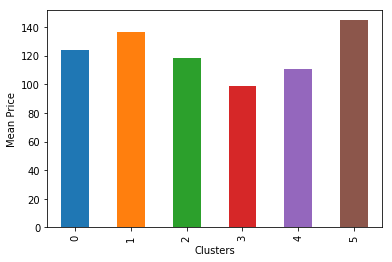

In [19]:
# Calculating Mean Price From Calendar
df_seattle_calendar['price_cleaned'] = pd.to_numeric(df_seattle_calendar['price'].str.replace('$', '').str.replace(',', ''))
df_seattle_listings_mean_price = df_seattle_calendar.groupby('listing_id')['price_cleaned'].mean().round(2)

df_seattle_listings_mean_price = df_seattle_listings_mean_price[(df_seattle_listings_mean_price.quantile(0.025)<=df_seattle_listings_mean_price)&
                                                                (df_seattle_listings_mean_price<= df_seattle_listings_mean_price.quantile(0.975))]

# Clustering
df_to_cluster = df_seattle_listings[df_seattle_listings['is_location_exact'] == 't'] [['latitude', 'longitude']]
df_to_cluster['mean_price'] = df_seattle_listings_mean_price
df_to_cluster = df_to_cluster.dropna()

kmeans_loc = KMeans(n_clusters=6)
df_to_cluster['loc_clusters'] = kmeans_loc.fit_predict(df_to_cluster[['latitude', 'longitude']])

print(df_to_cluster.groupby('loc_clusters')['mean_price'].mean())
df_to_cluster.groupby('loc_clusters')['mean_price'].mean().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Mean Price')
plt.show()

# Mapping
map_seattle = folium.Map()
d_colors = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown'}
d_mean_prices = {0:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[0],
                 1:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[1],
                 2:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[2],
                 3:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[3],
                 4:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[4],
                 5:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[5]}

# Map of 1000 listings sample.
df_to_cluster.sample(1000).apply(lambda row: folium.CircleMarker(location=[row["latitude"], row["longitude"]],
                                                                color=d_colors[row['loc_clusters']], 
                                                                popup=d_mean_prices[row['loc_clusters']]).add_to(map_seattle) ,axis=1)

map_seattle.save('map_seattle.html')

map_seattle

**3. Does These Result Can Be Aplicable to Boston?**

3.1. Wording Effects?

In [61]:
# Lest take all descriptive columns and concatanete them into one column as str.
l__listings_des_cols = ['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit']
df_boston_listings[l__listings_des_cols] = df_boston_listings[l__listings_des_cols].astype('str')
df_boston_listings['all_decription'] = df_boston_listings[l__listings_des_cols].apply(','.join, axis=1)

# Create a new df for all descriptions and all reviews
# First join reviews and comments on id. This required to concatanate comments of id's into one rows.
# Assign new column names
# Tokenize descriptions and reviews for further investigations.
# First assignt str type to comments collumn.
df_boston_reviews['comments'] = df_boston_reviews['comments'].astype('str')
df_boston_desc_vs_rew = df_boston_listings['all_decription'].to_frame().join(df_boston_reviews.groupby('listing_id')['comments'].agg(','.join))
df_boston_desc_vs_rew.columns = ('all_description', 'all_reviews')

df_boston_desc_vs_rew['tokenized_descs'] = df_boston_desc_vs_rew['all_description'].astype('str').apply(f_tokenize)
df_boston_desc_vs_rew['tokenized_revs'] = df_boston_desc_vs_rew['all_reviews'].astype('str').apply(f_tokenize)

# Create intersection and differance of words
df_boston_desc_vs_rew['words_intersection']  = str(None)
df_boston_desc_vs_rew['words_difference']  = str(None)

for index in df_boston_desc_vs_rew.index:
    df_boston_desc_vs_rew.loc[index]['words_intersection'] = list(set(df_boston_desc_vs_rew.loc[index]['tokenized_revs']).intersection(set(df_boston_desc_vs_rew.loc[index]['tokenized_descs'])))
    df_boston_desc_vs_rew.loc[index]['words_difference'] = list(set(df_boston_desc_vs_rew.loc[index]['tokenized_revs']).difference(set(df_boston_desc_vs_rew.loc[index]['tokenized_descs'])))

    
# Creating word clouds for 4 columns and saving it.
words_description_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'tokenized_descs', 'words_description_cloud_b')
words_review_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'tokenized_revs', 'words_review_cloud_b')

words_intersection_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'words_intersection', 'words_intersection_cloud_b')
words_difference_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'words_difference', 'words_difference_cloud_b')

print(words_description_cloud_b.words_)
print(words_review_cloud_b.words_)

print(words_intersection_cloud_b.words_)
print(words_difference_cloud_b.words_)

{'minute walk': 1.0, 'living room': 0.7589175891758918, 'nan nan': 0.734009840098401, 'back bay': 0.721709717097171, 'downtown boston': 0.6140836408364083, 'walking distance': 0.5916359163591636, 'south end': 0.5289052890528906, 'none nan': 0.43573185731857317, 'orange line': 0.4132841328413284, 'green line': 0.4043665436654367, 'public transportation': 0.4009840098400984, 'min walk': 0.3997539975399754, 'washer dryer': 0.3619311193111931, 'size bed': 0.35731857318573185, 'beacon hill': 0.3505535055350554, 'north end': 0.3440959409594096, 'boston common': 0.33517835178351785, 'house': 0.3342558425584256, 'easy access': 0.3102706027060271, 'street parking': 0.30719557195571956, 'queen bed': 0.2964329643296433, 'red line': 0.2933579335793358, 'fully equipped': 0.288130381303813, 'well': 0.27490774907749077, 'queen size': 0.2699876998769988, 'home': 0.25153751537515373, 'bedroom apartment': 0.2420049200492005, 'jamaica plain': 0.23769987699877, 'private room': 0.232779827798278, 'fenway p

3.2. Location Based Clustering?

loc_clusters
0    154.605932
1    226.553440
2    126.315381
3    237.292443
4    102.965370
5    110.652468
Name: mean_price, dtype: float64


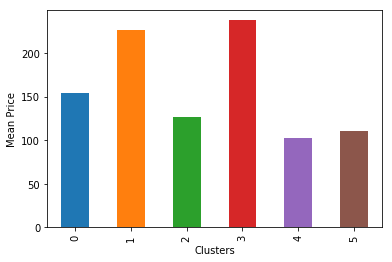

In [62]:
# Calculating Mean Price From Calendar
df_boston_calendar['price_cleaned'] = pd.to_numeric(df_boston_calendar['price'].str.replace('$', '').str.replace(',', ''))
df_boston_listings_mean_price = df_boston_calendar.groupby('listing_id')['price_cleaned'].mean().round(2)

df_boston_listings_mean_price = df_boston_listings_mean_price[(df_boston_listings_mean_price.quantile(0.025)<=df_boston_listings_mean_price)&
                                                                (df_boston_listings_mean_price<= df_boston_listings_mean_price.quantile(0.975))]

# Clustering
df_to_cluster = df_boston_listings[df_boston_listings['is_location_exact'] == 't'] [['latitude', 'longitude']]
df_to_cluster['mean_price'] = df_boston_listings_mean_price
df_to_cluster = df_to_cluster.dropna()

kmeans_loc = KMeans(n_clusters=6)
df_to_cluster['loc_clusters'] = kmeans_loc.fit_predict(df_to_cluster[['latitude', 'longitude']])

print(df_to_cluster.groupby('loc_clusters')['mean_price'].mean())
df_to_cluster.groupby('loc_clusters')['mean_price'].mean().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Mean Price')
plt.show()

# Mapping
map_boston = folium.Map()
d_colors = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown'}
d_mean_prices = {0:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[0],
                 1:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[1],
                 2:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[2],
                 3:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[3],
                 4:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[4],
                 5:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[5]}

# Map of 1000 listings sample.
df_to_cluster.sample(1000).apply(lambda row: folium.CircleMarker(location=[row["latitude"], row["longitude"]],
                                                                color=d_colors[row['loc_clusters']], 
                                                                popup=d_mean_prices[row['loc_clusters']]).add_to(map_boston) ,axis=1)

map_boston.save('map_boston.html')

map_boston

In [63]:
df_words_description_freq_seattle = pd.DataFrame.from_dict(words_description_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_review_freq_seattle = pd.DataFrame.from_dict(words_review_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_intersection_freq_seattle = pd.DataFrame.from_dict(words_intersection_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_difference_freq_seattle = pd.DataFrame.from_dict(words_difference_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

In [85]:
df_words_description_freq_seattle.head(25)

,frequency
capitol hill,1.000000
downtown seattle,0.994749
walking distance,0.822448
living room,0.808664
block away,0.754513
house,0.713160
home,0.666229
bus line,0.644568
pike place,0.621923
minute walk,0.601247


In [86]:
df_words_review_freq_seattle.head(25)

,frequency
walking distance,1.000000
great location,0.985349
highly recommend,0.872594
great host,0.852054
definitely stay,0.803792
place stay,0.786412
everything needed,0.645791
house,0.621230
great place,0.618500
clean comfortable,0.528296


In [87]:
df_words_intersection_freq_seattle.head(25)

,frequency
kitchen room,1.000000
restaurant shop,0.789621
quiet restaurant,0.647966
walk city,0.524544
one place,0.514727
bus need,0.493689
downtown home,0.486676
great space,0.475456
minute downtown,0.447405
coffee quiet,0.444600


In [89]:
df_words_difference_freq_seattle.head(25)

,frequency
definitely anyone,1.000000
near recommend,0.949608
easily really,0.932811
host highly,0.890258
provided airbnb,0.825308
excellent stayed,0.806271
went felt,0.800672
use loved,0.729003
arrival convenient,0.615901
pretty morning,0.602464


In [68]:
df_words_description_freq_b = pd.DataFrame.from_dict(words_description_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_review_freq_b = pd.DataFrame.from_dict(words_review_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_intersection_freq_b = pd.DataFrame.from_dict(words_intersection_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_difference_freq_b = pd.DataFrame.from_dict(words_difference_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

In [84]:
df_words_description_freq_b.head(25)

,frequency
minute walk,1.000000
living room,0.758918
nan nan,0.734010
back bay,0.721710
downtown boston,0.614084
walking distance,0.591636
south end,0.528905
none nan,0.435732
orange line,0.413284
green line,0.404367


In [83]:
df_words_review_freq_b.head(25)

,frequency
great location,1.000000
great host,0.864957
walking distance,0.779677
highly recommend,0.771320
place stay,0.684330
definitely stay,0.653181
minute walk,0.568091
house,0.535802
great place,0.512631
stay boston,0.509782


In [81]:
df_words_intersection_freq_b.head(25)

,frequency
kitchen room,1.000000
walk city,0.640596
restaurant shop,0.486034
place apartment,0.459963
quiet restaurant,0.417132
close boston,0.374302
location back,0.359404
walk line,0.353818
guest walk,0.346369
one place,0.327747


In [82]:
df_words_difference_freq_b.head(25)

,frequency
near recommend,1.000000
easily really,0.973568
host highly,0.908957
definitely anyone,0.832599
provided airbnb,0.762115
went felt,0.757709
excellent stayed,0.703377
arrival convenient,0.651982
use loved,0.644640
perfect hour,0.616740
